# Table of Contents
<font color = 'blue'>

1. [Load and Check Data](#1)
2. [Normalization of x_data Feature's](#2)
1. [Train-Test Split](#3)
1. [Defining Neccesary Functions](#4)
    1. [Parameter Initialize and Sigmoid Function](#5)
    1. [Forward and Backward Propagation](#6)
    1. [Updating (Learning) Parameters](#7)
    1. [Prediction](#8)
    1. [Defining Logistic Regression Function - FINAL STEP AND RESULT](#9)
1. [With Sklearn](#10)
    

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

<a id = '1'></a><br>
# Load And Read Data

In [ ]:
data = pd.read_csv("/kaggle/input/machine-learning-for-diabetes-with-python/diabetes_data.csv")

In [ ]:
data.head(10)

In [ ]:
y = data.Outcome.values
x_data = data.drop(["Outcome"],axis=1)

In [ ]:
x_data.head()

<a id = '2'></a><br>
# Normalization of x_data Feature's

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
x.head()

<a id = '3'></a><br>
# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


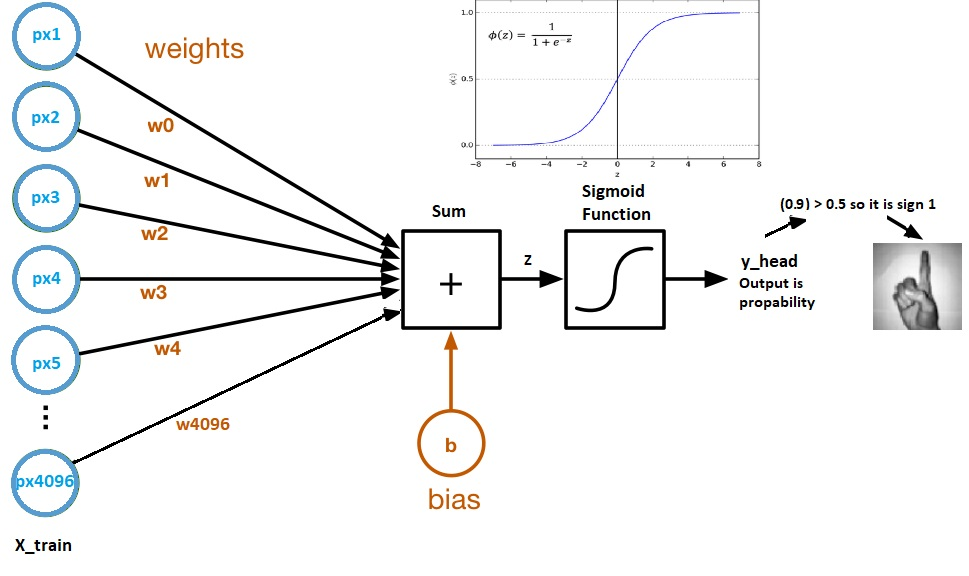

### * We will convert this Logistic Regression graph to python code!

Sklearn has a great library to do all the codes down below. I'm doing this in order to understand basic maths behind it.

<a id = '4'></a><br>
# Defining Neccesary Functions

<a id = '5'></a><br>
## Parameter Initialize and Sigmoid Function

In first function we will initialize weights and bias. In second function we will define the sigmoid function.

In [ ]:
#%% Parameter initialize and sigmoid function

def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    
    y_head = 1 / (1+np.exp(-z))
    
    return y_head

<a id = '6'></a><br>
## Forward and Backward Propagation

To do forward propagation we need value of z. It can be seen on graph. After calculating z we put it into sigmoid function we defined. Then we will need losses which it's mathematical model is down below. After calculating loss value we will define cost which is the summation of loss function.

Loss Function: 
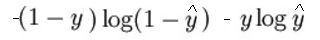

In [ ]:
#%% Forward and Backward Propagation

def forward_backward_propagation(w,b,x_train,y_head):
    
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients


To do backward propagation we need to read the mathematical graph backward. It means doing derrivative operation. After doing that we will store our cost and gradient values.

<a id = '7'></a><br>
## Updating (Learning) Parameters

After doing backward propagation we will see that we need to update our parameters which are weights and bias. Why we need to do that ? In order to increase accuracy of model.

In [ ]:
#%% Updating (Learning) Parameters
    
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost)) #if section defined to print our cost values in every 10 iteration. We do not need to do that. It's optional.
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

<a id = '8'></a><br>
## Prediction

In [ ]:
#%% Prediction

def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

#predict(parameters["weight"],parameters["bias"],x_test)

<a id = '9'></a><br>
## Defining Logistic Regression Function

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    

    # Print train/test Errors
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

In [ ]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 200)

In [ ]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 4, num_iterations = 100)

* You can get higher accuracy with adjusting the larning speed and number of iterations. But after certain point your accuracy won't change. You can also see that from the cost graph. The graph's derrivative (slope) is decreasing (assume that the slope is positive) with increasing number of iteration. So after certain amount of iteration the cost function won't decrease.

* I hope you can understand the mathematics (purpose of this notebook) behind Logistic Regression. Down below I did logistic regression with sklearn. It may has higher accuracy. If It is, it's because sklearn use other entries. I did not include them in here to make our codes simpler. Main idea in here was understanding the logic.

<a id = '10'></a><br>
# With Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {}".format(lr.score(x_test.T,y_test.T)))
